In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sys
df = pd .read_csv('mymoviedb.csv',lineterminator = '\n')

In [50]:
#here release date is in obj form means str ,convert it into DateTime
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [52]:
df.duplicated().sum(0)


0

In [54]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [56]:
# exploration summary
# .  we have a df consisting of 9827 rows and  9 columns
# .  our dataset looks tidy with no NaN nor duplicate values
# .  Release_Date column need to be caasted into DateTime and to extract only the year value
# .  overview , Original_Language and Poster_Url wouldn't be so useful during anaysis ,so we will drop them
# .  Vote_Average	 better be categorized fofr proper analysis
# .  Genre column has comma seperated values and whitespaces that need to be handled anad casted into category.exploration summary

In [58]:
# converting Release_Date into DateTime

df['Release_Date'] = pd.to_datetime (df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [60]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [62]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


 ### dropping the column

In [65]:
cols = ['Overview','Original_Language','Poster_Url']

In [67]:
df.drop(cols,axis  = 1, inplace = True)


In [69]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"




###  categorize vote average  column


we will cut the Vote_Average values and makee 4 categories: popular ,average,below_average ,and not_popular to describe it  more
using catigorize_col()  fu provided above

In [73]:
def catigorize_col(df,col,labels):

    edge = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col],edge,labels = labels, duplicates = 'drop' )
    return df

In [75]:
labels = ['Not_Popular','Below_Average','Average','Popular']
catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['Popular', 'Below_Average', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Average' < 'Average' < 'Popular']

In [77]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [79]:
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular      2467
Popular          2450
Average          2412
Below_Average    2398
Name: count, dtype: int64

### we will spread genere into a list  and then explode our dataframe  to have only one genere per row  fro each movie




In [82]:

df['Genre'] = df['Genre'].str.split(', ')
df =  df.explode('Genre').reset_index()
df.head() 

,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,1,2022,The Batman,3827.658,1151,Popular,Crime
4,1,2022,The Batman,3827.658,1151,Popular,Mystery


In [84]:
# casting column into category

df['Genre'] = df['Genre'].astype('category')


df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         25793 non-null  int64   
 1   Release_Date  25793 non-null  int32   
 2   Title         25793 non-null  object  
 3   Popularity    25793 non-null  float64 
 4   Vote_Count    25793 non-null  int64   
 5   Vote_Average  25552 non-null  category
 6   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(2), object(1)
memory usage: 958.2+ KB


In [90]:
df.nunique()

index           9827
Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [93]:
import seaborn as sns

In [151]:
sns.set_style('whitegrid')


# What is the most frequent Genre of movies released on Netflix

In [154]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

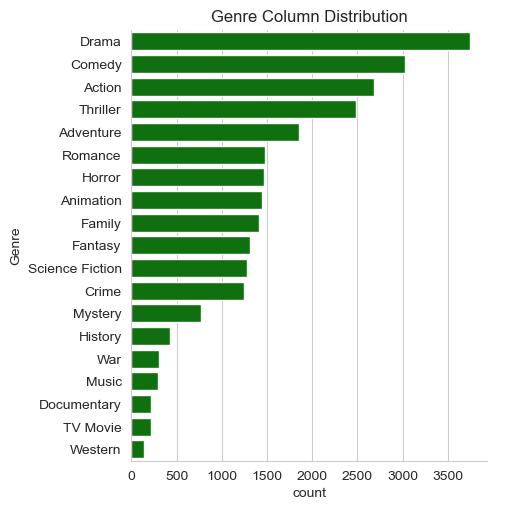

In [156]:
sns.catplot(data = df,y = 'Genre',kind = 'count',
            color = 'green',order = df['Genre'].value_counts().index)
plt.title('Genre Column Distribution')
plt.show()

# Which Has the higest votes in the vote average column

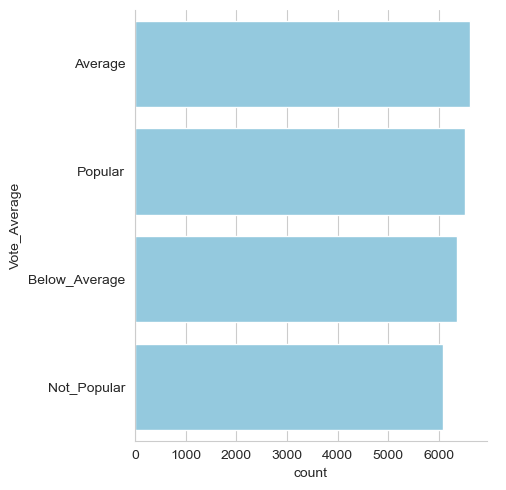

In [169]:
sns.catplot(data = df, y = 'Vote_Average',kind = 'count',
            order = df['Vote_Average'].value_counts().index,color  =  'skyBlue')
plt.show()

# Which movie got the highest  and Lowest 
popularity ? and what's its Genre ?

In [207]:
df[df['Popularity'] == df['Popularity'].max()][['Title', 'Genre', 'Popularity']]


,Title,Genre,Popularity
0,Spider-Man: No Way Home,Action,5083.954
1,Spider-Man: No Way Home,Adventure,5083.954
2,Spider-Man: No Way Home,Science Fiction,5083.954


In [221]:
df[df['Popularity']  == df['Popularity'].min()][['Title', 'Genre', 'Popularity']]

,Title,Genre,Popularity
25787,The United States vs. Billie Holiday,Music,13.354
25788,The United States vs. Billie Holiday,Drama,13.354
25789,The United States vs. Billie Holiday,History,13.354
25790,Threads,War,13.354
25791,Threads,Drama,13.354
25792,Threads,Science Fiction,13.354


# Which year has the most filmed movies

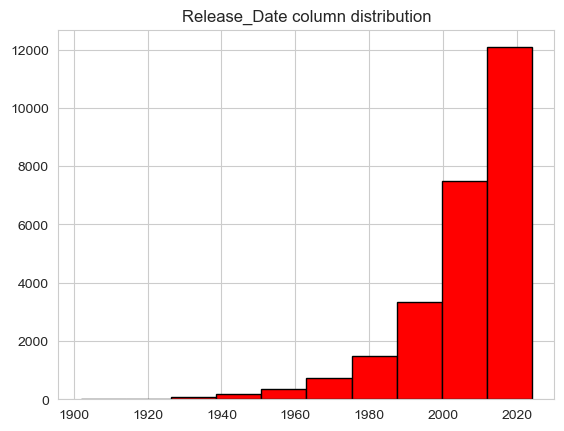

In [236]:
df['Release_Date'].hist(color = 'red',edgecolor = 'black')
df['Release_Date'].value_counts().index
plt.title('Release_Date column distribution')
plt.show()

# Conclusion

Q1 -  What is the most frequent Genre in the Dataset ?
Drama genre is the most frequent Genre in the Dataset and has 14% of the time along 19 other generes.

Q2 -  Which generes has the highest Votes ?
We have 25.5% of our dataset with popular votes (6520 rows) , Drama again gets the highest popularity among fans by having more than 18.5% 
of movies popularities.

Q3  - Which movie got the highest popularity ,what its genre ?
Spider - Man : no way home has the highest popularity  rate in our dataset it has generes  consisting of Action,Adventure and Science Fiction.

Q4 - Which movie got the lowest popularity ,what  its genre ?
The united states , Thread has the highest lowest rate in our dataset and it has generes of music,drama,war,sci - fi , and history.

Q5 - Which year has the  most filmed  movies ?
2020 year has the  most filmed  movies rate in the dataset .


